In [1]:
import seaborn as sns
import os 
import pandas as pd

In [2]:
list_of_results = []
# loop through all dirs in results
base_path = "../results/"
for net_dir in os.listdir(base_path):

    if net_dir in ['github','nodes_mapping', 'remapped_nets'] : continue
    path = os.path.join(base_path, net_dir)

    if net_dir == '.DS_Store': continue

    # loop through all files in dir
    for dim_dir in os.listdir(path):

        dim_path = os.path.join(path, dim_dir) 

        if dim_dir == '.DS_Store': continue
        # loop through all files in dir
        for result_file in os.listdir(os.path.join(dim_path, 'results')):
            if result_file == '.DS_Store':
                continue
            result_path = os.path.join(dim_path, 'results', result_file)
            
            # load results
            df = pd.read_csv(result_path, header=None)
            # add to list
            list_of_results.append([net_dir, dim_dir, df.values.T[0][1]])

In [3]:
# convert to dataframe
df = pd.DataFrame(list_of_results, columns=['network', 'dimension', 'divergence_score'])

In [4]:
df

,network,dimension,divergence_score
0,emails,dim_16,0.058492
1,emails,dim_16,0.048216
2,emails,dim_16,0.048009
3,emails,dim_16,0.048799
4,emails,dim_16,0.066736
...,...,...,...
535,airports,dim_64,0.009080
536,airports,dim_64,0.008015
537,airports,dim_64,0.009456
538,airports,dim_64,0.007909


<Axes: xlabel='dimension', ylabel='divergence_score'>

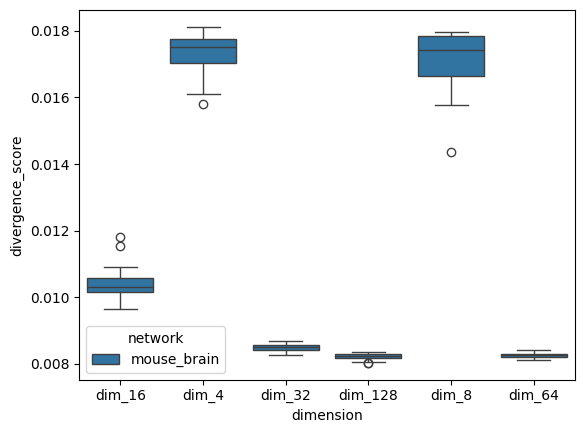

In [5]:
# box plot of mouse brain net, hue by dimension
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'mouse_brain'])

<Axes: xlabel='dimension', ylabel='divergence_score'>

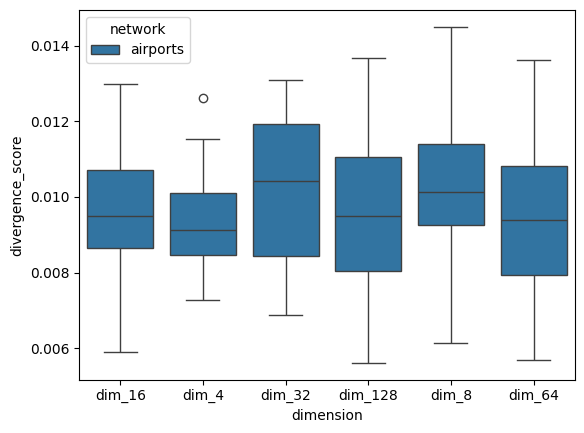

In [6]:
# airports
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'airports'])

<Axes: xlabel='dimension', ylabel='divergence_score'>

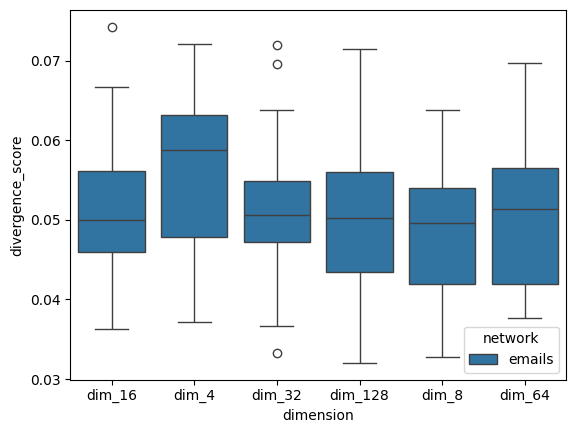

In [7]:
# emails 
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'emails'])